## Assignment 3: Edge detection
Author: Sofia Navarro
Date: 8/3/2021

In [86]:
# Import all the necessary packages
import os
import sys
import cv2
import numpy as np
sys.path.append(os.path.join(".."))
from utils.imutils import jimshow
from utils.imutils import jimshow_channel

In [71]:
# define the path to the image
text_image = os.path.join("..", "data", "_We_Hold_These_Truths__at_Jefferson_Memorial_IMG_4729.jpg")
truths = cv2.imread(text_image)

In [72]:
# See what the dimensions of the image are
truths.shape

(3240, 4320, 3)

In [73]:
# Draw a rectangle around the text of the image 
truths_ROI = cv2.rectangle(truths, (1300, 830), (2930, 2850), (0, 255, 0), 3)

In [74]:
# Crop the image to include only the area marked by the rectangle using slicing 
crop_ROI = truths_ROI[830:2850, 1300:2930]

In [75]:
# Make an outpath to where I save the image to
outpath = os.path.join("..", "data", "image_cropped.jpg")

# Save the image to this path
save_cropped = cv2.imwrite(outpath, crop_ROI)

## Detecting every letter in the image

In [76]:
# Define the path to the cropped image
crop_path = os.path.join("..", "data", "image_cropped.jpg")

# Load image
cropped_truths = cv2.imread(crop_path)

In [77]:
# First the image is blurred using Gaussian blur
blurred = cv2.GaussianBlur(cropped_truths, (5,5), 0)

In [78]:
# Create the canny object to perform canny edge detection on the image
canny = cv2.Canny(blurred, 30, 150)

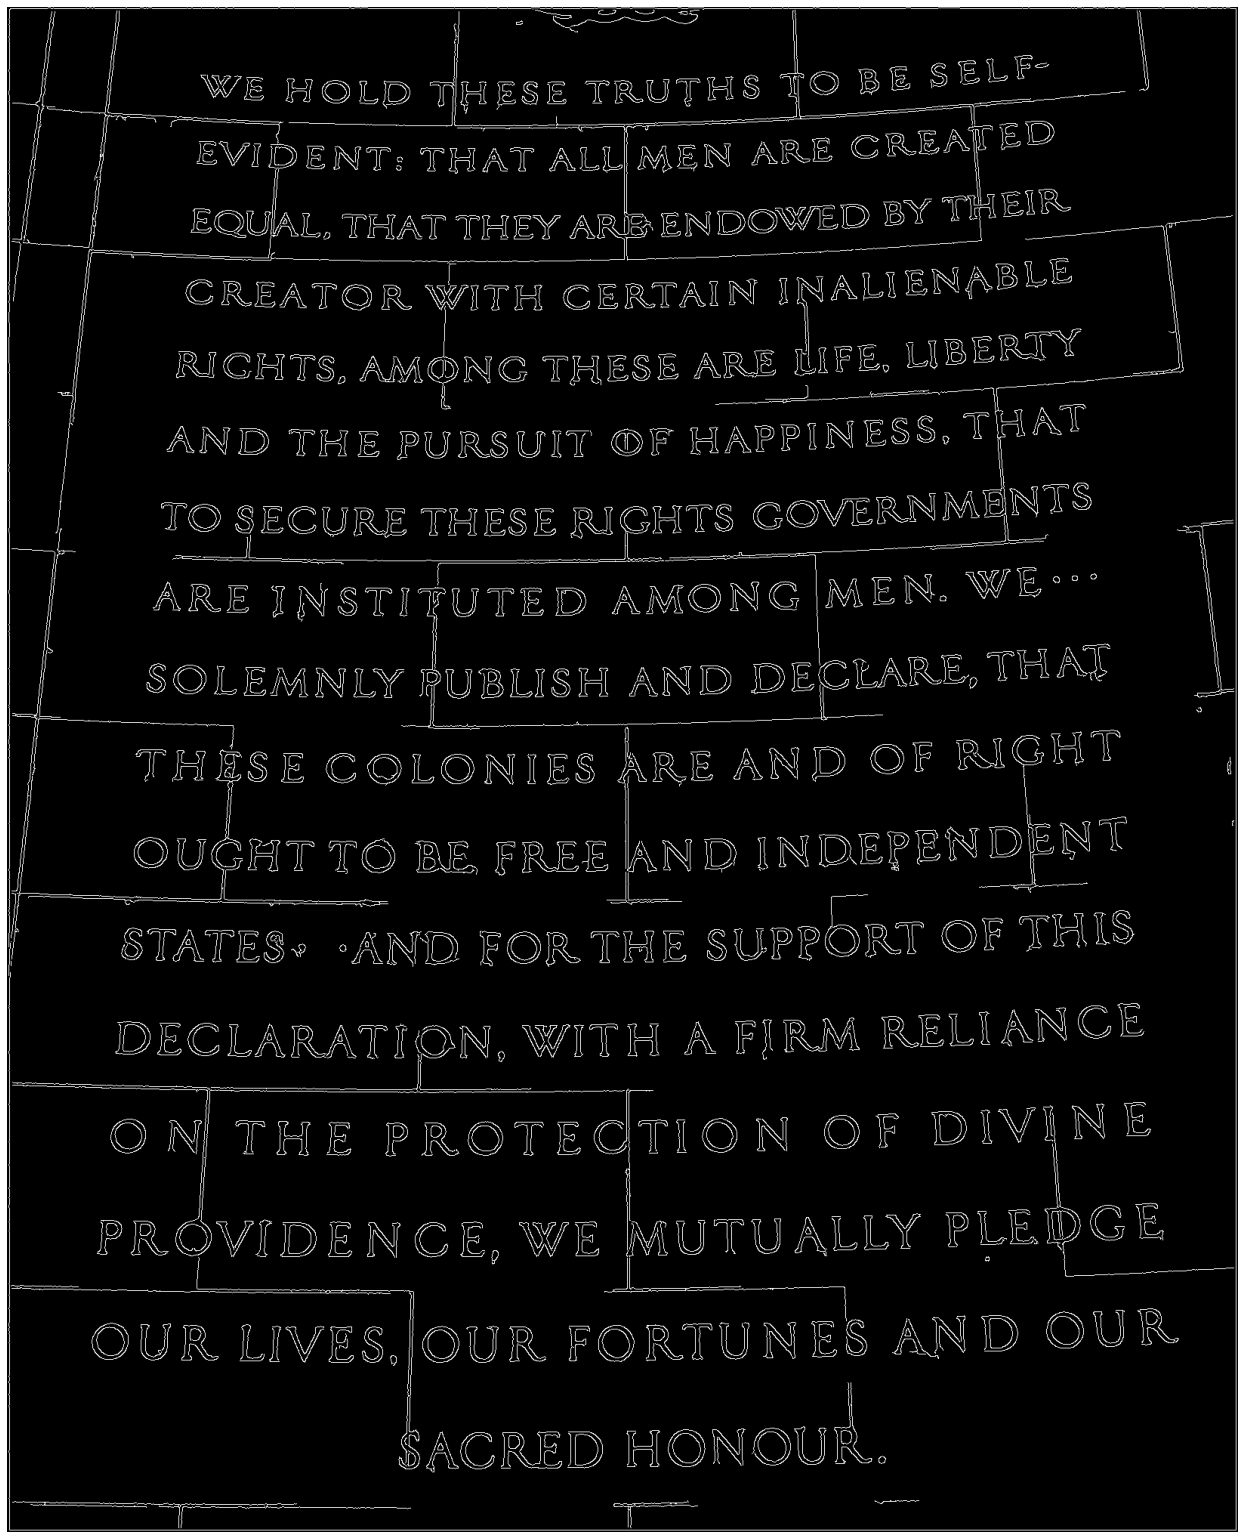

In [47]:
# Let's see what the image looks like after the canny edge detection has been performed
jimshow_channel(canny)

In [79]:
# Now, we're interested in the external contour of the objects in the image
# So we filter out any inner structures from the outer edge of the whole object
# the function findContours() is used on a copy of the cropped image, so we don't modify it in place
(contours, _) = cv2.findContours(canny.copy(),
                 cv2.RETR_EXTERNAL,
                 cv2.CHAIN_APPROX_SIMPLE)

In [83]:
# Lastly, after defining the external contours we want to draw green contour lines
letters_image = cv2.drawContours(cropped_truths, # draw contours on copy of original image
                         contours, # our list of contours
                         -1, # which contours to draw (on all the letters)
                         (0,255,0), # contour color green
                         1) # contour pixel width

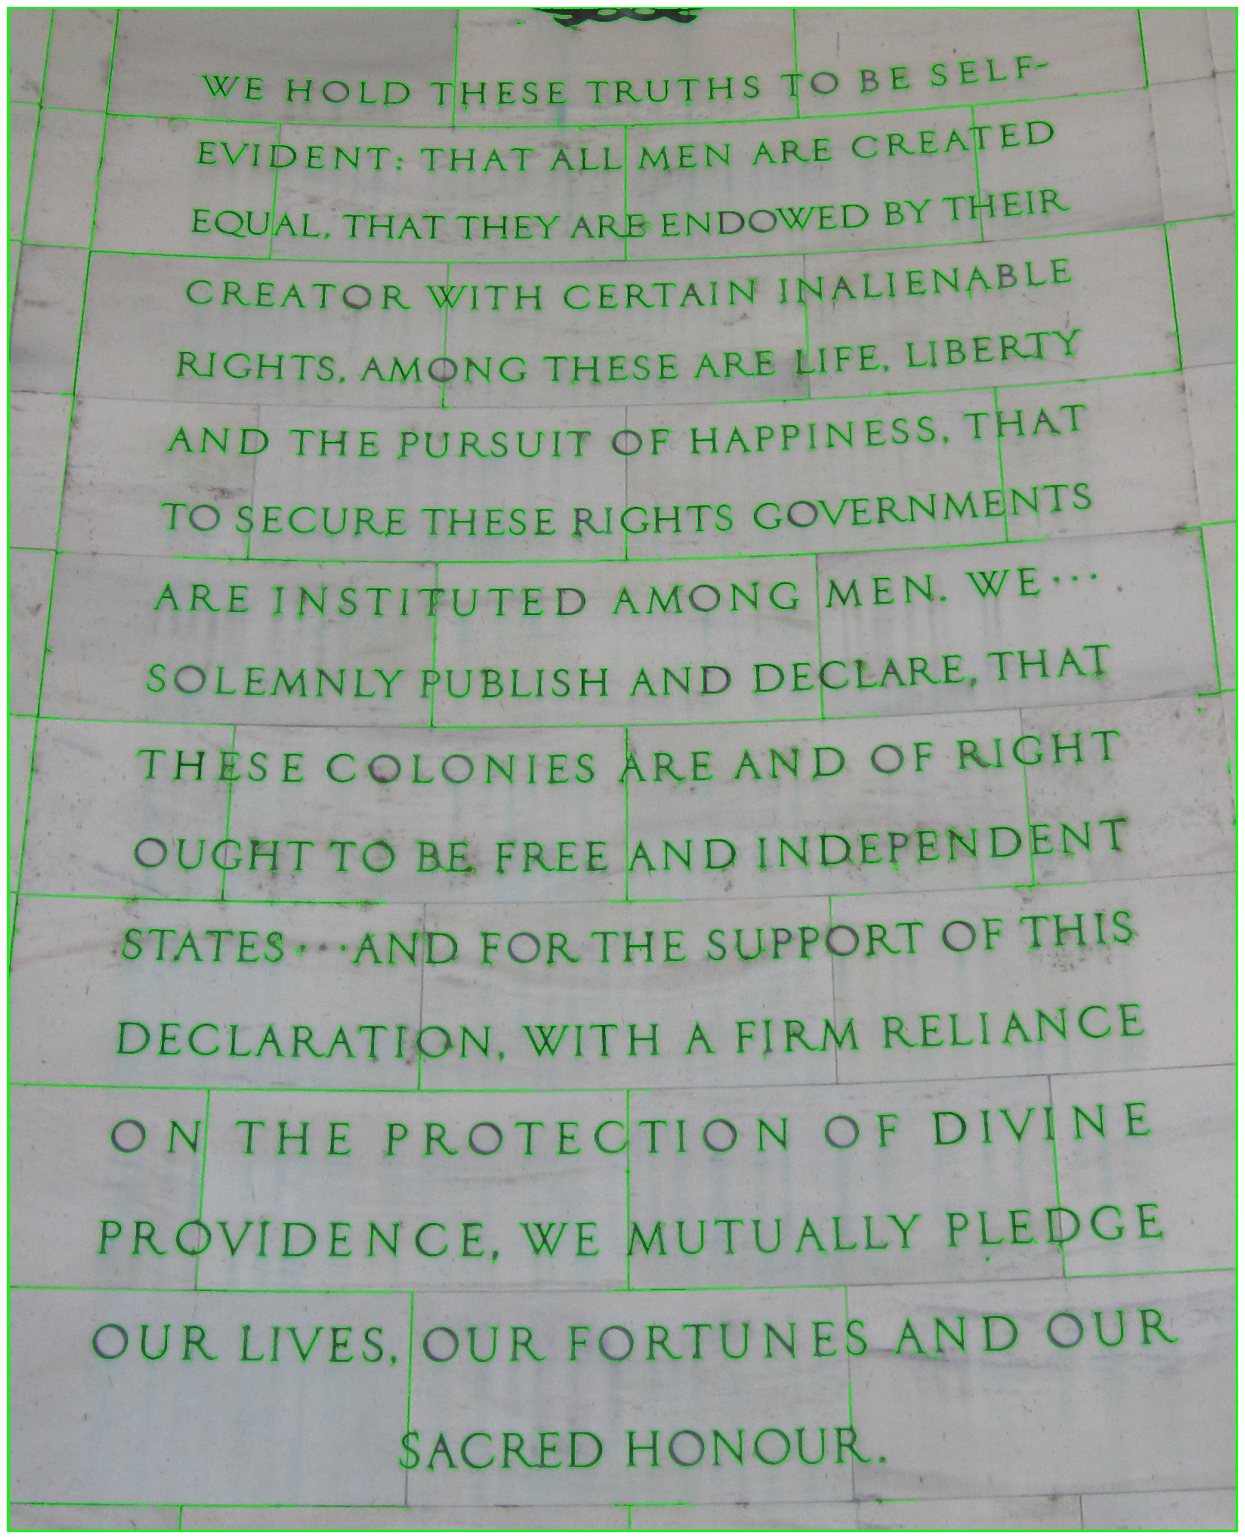

In [85]:
# Show me the image
jimshow(letters_image)

In [59]:
# How many letters are in the image?
print(f"The text in the image consists of {len(contours)} letters!")

The text in the image consists of 921 letters!


In [84]:
# Make outpath to the image
outpath2 = os.path.join("..", "data", "image_letters.jpg")

# Save this image
cv2.imwrite(outpath2, letters_image)

True